# Decision Tree Setting and more Evaluation

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set(palette ='colorblind') # this improves contrast

from sklearn.metrics import confusion_matrix, classification_report

## Review

In [2]:
corner_data = 'https://raw.githubusercontent.com/rhodyprog4ds/06-naive-bayes/f425ba121cc0c4dd8bcaa7ebb2ff0b40b0b03bff/data/dataset6.csv'
df6= pd.read_csv(corner_data,usecols=[1,2,3])
iris_df = sns.load_dataset('iris')

In [3]:
df6.columns

Index(['x0', 'x1', 'char'], dtype='object')

set up the same splits again

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df6[['x0','x1']],
                                                   df6['char'],
                                                    random_state=34)

Fit a baseline model with default settings

In [5]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

1.0

it does well, but let's examine it more closely. First, we'll look back at the data.

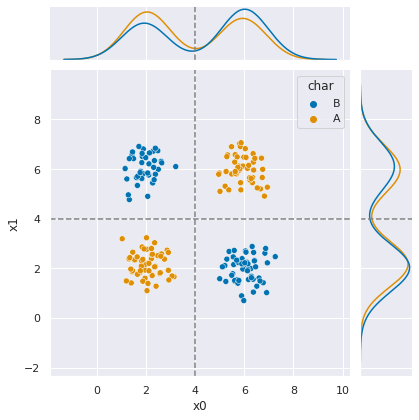

In [6]:
g = sns.JointGrid(data=df6, x='x0', y ='x1', hue='char')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)
g.refline(x=4, y=4)

In this, the dashed lines represent boundaries that separate the two classes.
Next, we can look at what it learned. Using `filled=True` makes the nodes shaded, so we can examine it better.

[Text(0.5909090909090909, 0.875, 'X[0] <= 5.88\ngini = 0.5\nsamples = 150\nvalue = [73, 77]'),
 Text(0.36363636363636365, 0.625, 'X[1] <= 3.785\ngini = 0.492\nsamples = 103\nvalue = [58, 45]'),
 Text(0.18181818181818182, 0.375, 'X[0] <= 4.07\ngini = 0.406\nsamples = 53\nvalue = [38, 15]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.5454545454545454, 0.375, 'X[0] <= 4.085\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.8181818181818182, 0.625, 'X[1] <= 3.895\ngini = 0.435\nsamples = 47\nvalue = [15, 32]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]')]

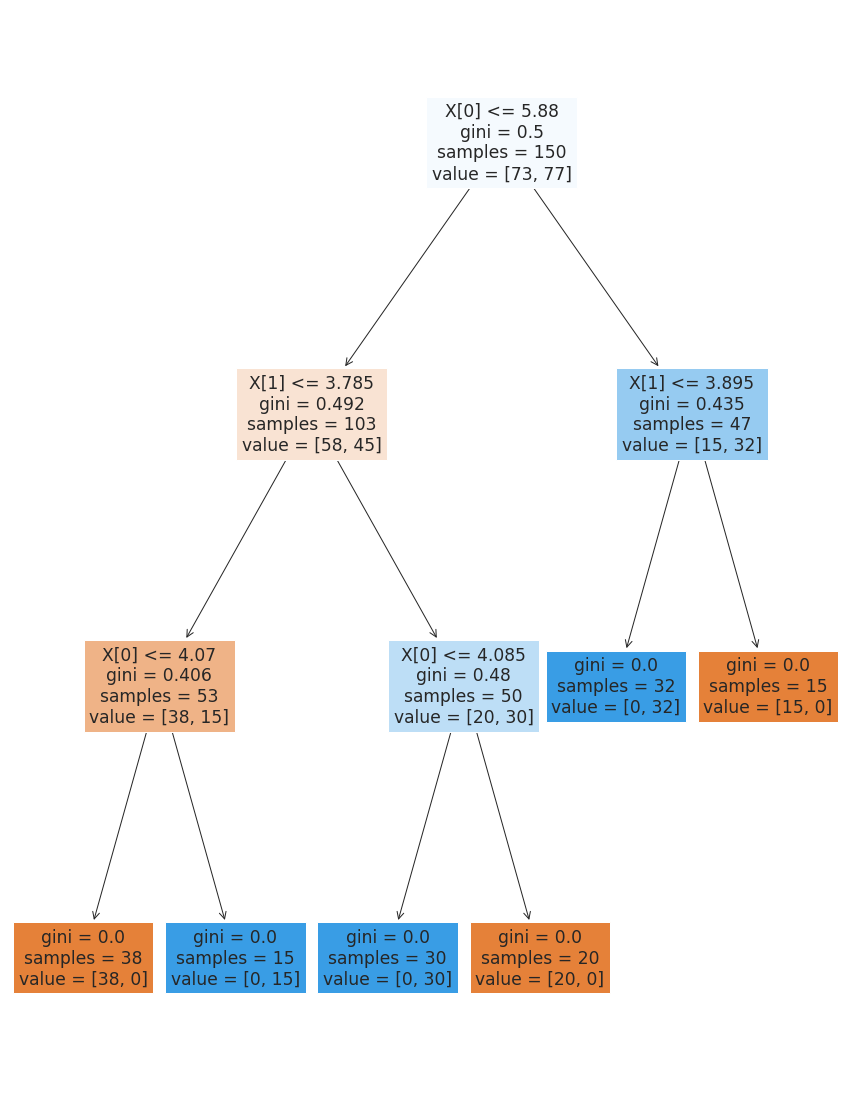

In [7]:
plt.figure(figsize=(15,20))
tree.plot_tree(dt,filled=True)

Each node in the tree shows the threshold that wa compared, the gini score and the number of samples from each class from the training data that pass through that node.

we can see from the graph what happened, but this is still not finding what we know would be the best performing decision tree.

Let's try limiting when it can split based on the share of the data.

In [8]:
dt_large_split = tree.DecisionTreeClassifier(min_samples_split=.2,
                                             max_depth=2)
dt_large_split.fit(X_train,y_train)
dt_large_split.score(X_test,y_test)

0.8

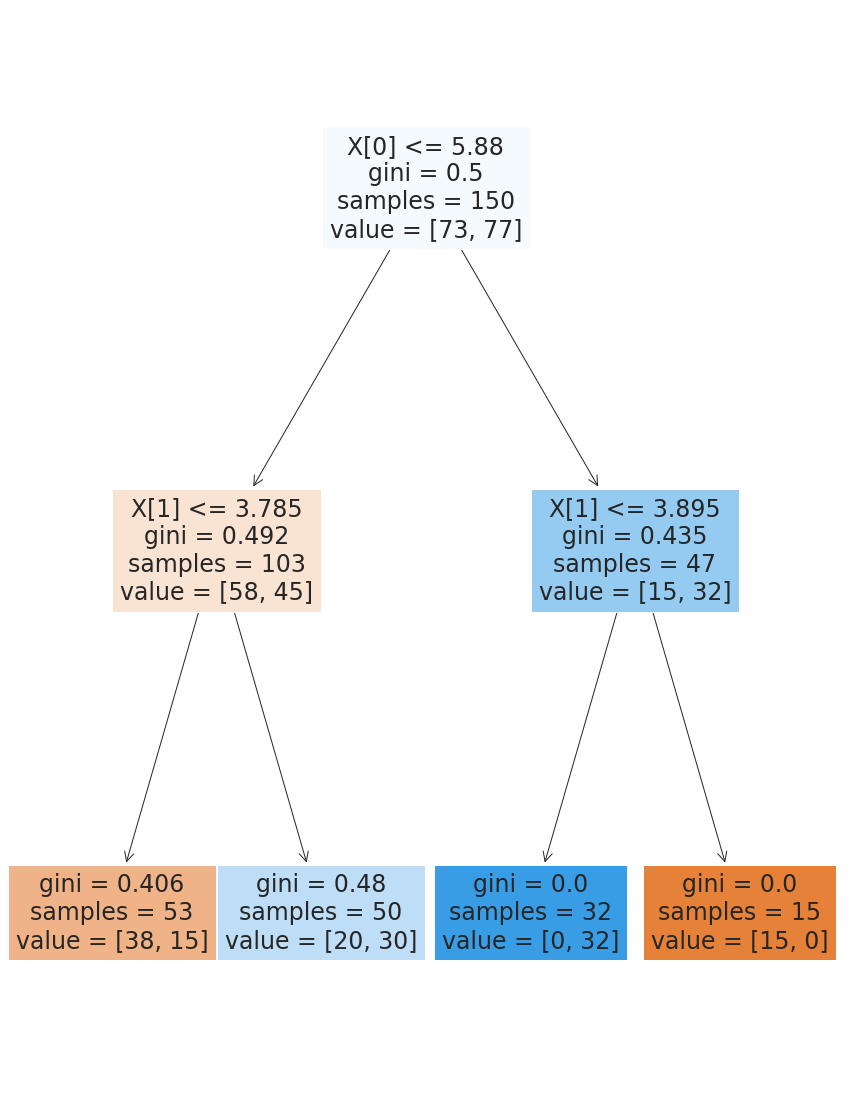

In [9]:
plt.figure(figsize=(15,20))
tree.plot_tree(dt_large_split,filled=True);

In [10]:
dt_large_split = tree.DecisionTreeClassifier(min_samples_split=.4,
                                             max_depth=2)
dt_large_split.fit(X_train,y_train)
dt_large_split.score(X_test,y_test)

0.66

We can also limit based on how much data has to be in each leaf.

In [11]:
dt_large_leaf = tree.DecisionTreeClassifier(min_samples_leaf=.2)
dt_large_leaf.fit(X_train,y_train)
dt_large_leaf.score(X_test,y_test)

0.66

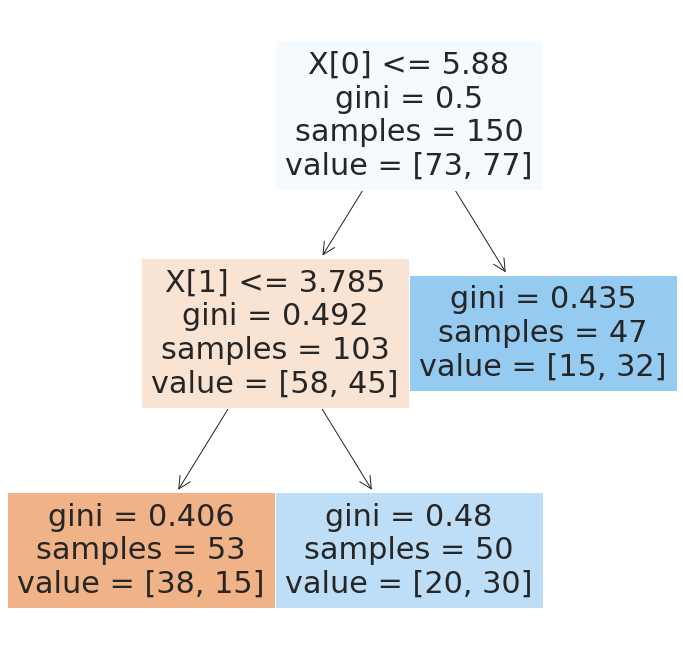

In [12]:
plt.figure(figsize=(12,12))
tree.plot_tree(dt_large_leaf,filled=True);

This one gets the right number of levels, but still does not have good performance.

## More evaluation

To do more detailed evaluation than the main score, we have to get the predictions.

In [13]:
y_pred_ll = dt_large_leaf.predict(X_test)
print(classification_report(y_test,y_pred_ll))

              precision    recall  f1-score   support

           A       0.76      0.57      0.65        28
           B       0.59      0.77      0.67        22

    accuracy                           0.66        50
   macro avg       0.67      0.67      0.66        50
weighted avg       0.68      0.66      0.66        50



We can also get the confusion matrix out

In [14]:
confusion_matrix(y_test,y_pred_ll)

array([[16, 12],
       [ 5, 17]])

We can unpack those values into individual elements, that match the [true negative, false positive, false negative, true positive labels](https://en.wikipedia.org/wiki/Confusion_matrix) using [ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) flattens a 2d numpy array; defaul is 'C' row major order; can change with order param

In [15]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_ll).ravel()

We can compute other metrics from the confusion matrix:

````{margin}
```{admonition} Further Reading

More on confusion matrices, use both to match up and figure out how you can calculate other metrics from these.
- [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [wiki](https://en.wikipedia.org/wiki/Confusion_matrix)
```
````

Accuruacy is the true ones/ total number of samples

In [16]:
(tp + tn)/(tp+fp+fn+tn)

0.66

## Parsing Assignment 7

What does data good for classification look like?

- there has to be a categorical variable to be the target
- there has to be other variables as the features where it makes sense to predict the target from those variables

Datasets for Machine Learning: the [UCI repository](https://archive.ics.uci.edu/ml/index.php)

The new [beta](https://archive-beta.ics.uci.edu/) has a nicer interface for finding data.

You can filter by task and type of data. So far, we've only worked with tabular data and studied classification.

![a screenshot of the UCI Repo beta settings page, with Data Characteristics set to Tabular and Associated Tasks set to classification](../img/uci_settings_a7.png)

## Questions after class

### Is there some kind of rule of thumb to make it go faster?
```{toggle}
Not exactly.  The more you understand the models you'll build intutition that helpd you decide faster and there are ways to use search algorithm to find the best set of parameters.  We'll see those in a couple of weeks.  For now, try a little experimentation and we'll consider more then.
```


## More Practice

1. Write a function that uses if, else to implement the predict function of a decision tree
1. Compute the metrics from the confusion matrix (accuracy, precision, recall)
1. Apply Decision tree to the iris data


<!-- Precision is the percent of the positive predicted (in this case positive is predicted B)

```{code-cell} ipython3
:tags: ["hide"]
tp/(tp+fp)
```

```{code-cell} ipython3
tp/(tp+fn)
```

The precision and recall of the other class use the true negatives as the numerator

```{code-cell} ipython3
tn/(tn+fn), tn/(tn+fp)
``` -->